# One Dimensional Integration Using a Simple Metropolis Sampling Technique


###  Target is a well known exponential distribution function:
$$ f(x) =A \exp(-\lambda x) : ~~~ \{ x > 0\} $$

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output 
import sympy as sp


### Parameters

In [2]:
a = 1 #The upper limit of the integration
b = 5# The lower limit of the integration
sample_numbers = 10000 #the number of samples  
ini = 2 #initial sample 

### Analytical calculation using symPy package

In [ ]:
# defining the parameters for symPy
x_sp = sp.Symbol('x')
a_sp = sp.Symbol('a')
b_sp = sp.Symbol('b')
A_sp = sp.Symbol('A')
l_sp = sp.Symbol('lambda', nonzero = True)

# analytical form of the target distribution function
g_func = A_sp * sp.exp(- l_sp * x_sp)

#integration of the function: a = lower limit and b = upper limit:
G_ab  = sp.integrate(g_func , (x_sp, a_sp , b_sp))
display(G_ab)

#finding A(lambda): solve G_ab = 1 and inverse the result
A_of_l = sp.solve(G_ab - 1 , A_sp)
display( A_of_l[0])

#### making a computational form of the A(lambda) using "lambdify function":   

In [4]:
Al_numpy = sp.lambdify((l_sp,a_sp,b_sp), A_of_l, 'numpy')

def Al(l, a, b):
    return Al_numpy(l, a, b)[0]

In [5]:
# target distribution function 

def g_func(x, A , l ):
    return A*np.exp(-l*x)

In [6]:
g_func(1,Al(2,a,b),3)

0.7360057847775976

###  Metropolis Algorithm

In [13]:

def metropolis(a , b , l , total_steps, initial):
    i = 0
    step_size = 1
    x1 = initial
    test_i = 0
    number_test = 0
    x = np.zeros([total_steps])
    A = Al(l=l,a = a,b = b)
    
    while i < total_steps:
        normal_random_number = np.random.normal(loc=0.0, scale=1.0, size=None) # random walk kernel
        flat_random_number = np.random.rand()
        x[i] = x1 # current position
        x2 = x1 + step_size*normal_random_number #next position
        
        if x2 <=a or x2>b: # bounding random numbers between a and b
            test_i = test_i + 1
            continue
            
        else:
            i = i + 1
            number_test = number_test+1
            g1 = g_func(x1, A ,l)
            g2 = g_func(x2, A ,l)
            r = g2/g1
            prob = np.min([1, r]) # acceptance probabilty
            if prob > flat_random_number:
                x1 = x2
                
    return x
        

### running and plotting  algorithm for test

In [14]:
#runing metropolis for test

metropolis_test = metropolise(a , b , 2, sample_numbers,2)


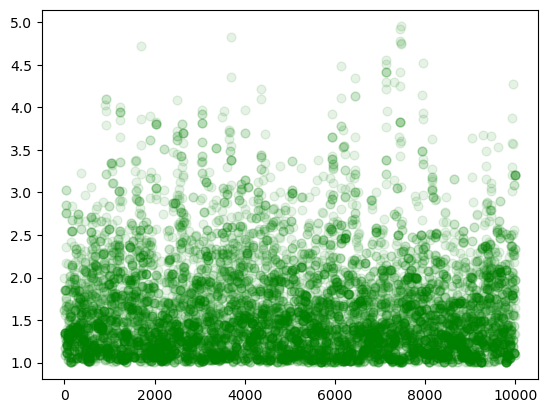

In [15]:
# plot samples
x_1 = np.linspace(0 ,sample_numbers, sample_numbers)
plt.scatter(x_1, metropolis_test ,alpha = 0.1, s =40, color = 'green')

##  Integral Calculator

$$f(x) = \frac{e^{-x}}{1+(x-1)^2}  $$

In [16]:
#the target function
def f(x):
     return np.exp((-x))/(1+(x-1)**2)

### Integration algorithm


In [19]:

def integration(lower_bound , upper_bound, Lambda, samples, start_point):
    sum_func = 0
    f_to_g_test=[]
    a = lower_bound
    b = upper_bound
    l = Lambda
    N = samples
    ini = start_point # an arbitrary start point between a and b
    x = metropolis(a , b , l, N, ini ) # calling distributed random numbers by "metropolis" function
    A = Al(l, a , b)
    
    for i in range(0,N):
        G = g_func(x[i],A,l)
        F = f(x[i])
        func = F/G
        f_to_g_test.append(func)
        sum_func = func + sum_func
        integral_of_f = sum_func/N
       
        
    return integral_of_f, np.var(f_to_g_test) # returning integral and its variance 
    

### Finding the best parameters based on the minimum variance technique

In [62]:
# making a list of lambda parameter to find the best lambda
var_of_l = []
lambda_list = []
iteration_of_lambda = (2.5)/100
lam = 0.5 #initial lambda
for i in range(100):
    var_of_l.append(integration(a , b, lam, 100, 2)[1])
    lambda_list.append(lam)
    lam = lam + iteration_of_lambda
var_of_l; # a list of variance of the results in terms of lambda
   

the minimum of the varianc:  0.00017772401333098314
optimized Lambda: 1.7749999999999977


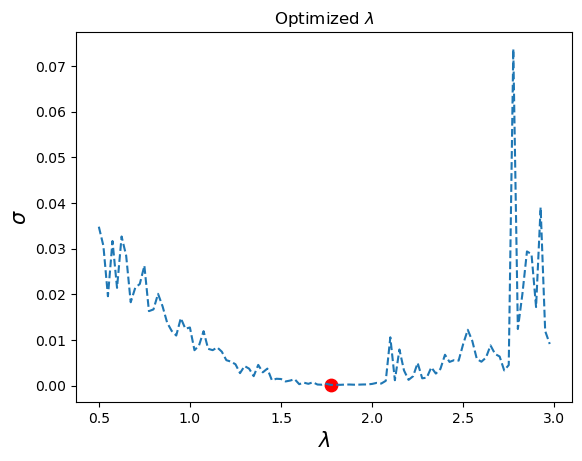

In [63]:
#Lambda parameter visualization 
plt.plot(lambda_list,var_of_l, linestyle = 'dashed')
best_var = np.amin(var_of_l)
print("the minimum of the varianc: ",best_var)
cell = np.where(var_of_l == best_var)[0][0]
best_lambda = lambda_list[cell]
print("optimized Lambda:" , best_lambda)
plt.scatter(best_lambda,best_var, color = 'red', s = 80)
plt.title("Optimized $\lambda$")
plt.xlabel('$\lambda$', size = 15)
plt.ylabel('$\sigma$', size = 15)
plt.show()

### distribution function visualization


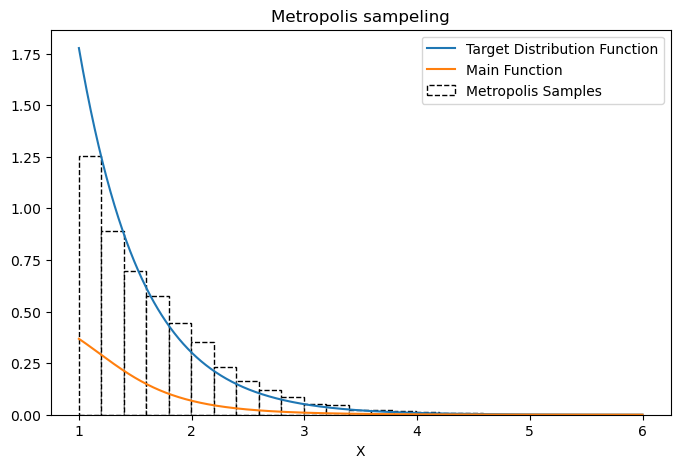

In [77]:
# distribution function visualization (lambda = optimized lambda)
Aa = Al(best_lambda, a , b)
plt.figure(figsize=(8,5))
plt.xlabel("X")
Xx = metropolis(a=a, b=b, l=best_lambda, total_steps=sample_numbers ,initial=2 )
plt.title("Metropolis sampeling")
x_1 = np.linspace(1 , 6, 1000)
plt.plot(x_1, g_func(x_1,Aa,best_lambda ), ls = 'solid' , label = "Target Distribution Function")
plt.plot(x_1,f(x_1), label = "Main Function")
plt.hist(Xx, bins= 20, color = 'white', ls = 'dashed', ec = 'black', density = True, label = 'Metropolis Samples' )
plt.legend()
plt.show()


In [50]:
f_integration, variance =  integration(lower_bound=1,upper_bound=5,Lambda=best_lambda,samples=10000, start_point=ini)
print(f" integral of f = {f_integration} \n and the variance = {variance}" )

 integral of f = 0.2295271515227549 
 and the variance = 0.00016141402970297678
